Monte Carlo Greeks — Pathwise & Finite Difference

- $\Delta$ (Pathwise)

\begin{equation}
\Delta^{PW}
= \mathbb{E}\left[ e^{-rT}, \mathbf{1}_{{S_T > K}} ,\frac{S_T}{S_0} \right]
\end{equation}

with
$\frac{\partial S_T}{\partial S_0} = \frac{S_T}{S_0}.$


- $\nu$ (Pathwise) (in Finance, it is called "vega" not "nu")

\begin{equation}
\nu^{PW}
= \mathbb{E}\left[ e^{-rT}, \mathbf{1}_{{S_T > K}} , S_T\left(-\sigma T + \sqrt{T},Z\right) \right]
\end{equation}

since
$\frac{\partial S_T}{\partial \sigma}
= S_T\left(-\sigma T + \sqrt{T}\,Z\right).$



- $\Gamma$ (Finite Difference)

Payoff is not twice differentiable (contains a Dirac Delta, which is not easy to simulate), so use central finite difference -- which is a representation of the dirac delta function:
\begin{equation}
\Gamma^{FD}
\approx \frac{ C(S_0(1+h)) - 2C(S_0) + C(S_0(1-h)) }{ (S_0 h)^2 }.
\end{equation}


- $\Theta$ (Pathwise, sketch)

Two contributions: discount factor and $\partial S_T / \partial T$:
\begin{equation}
\Theta^{PW}
= \mathbb{E}\Big[
\frac{\partial}{\partial T} \Big( e^{-rT} (S_T - K)^+ \Big)
\Big].
\end{equation}

with
$\frac{\partial S_T}{\partial T}
= S_T\Big((r - \tfrac{1}{2}\sigma^2) + \tfrac{\sigma Z}{2\sqrt{T}}\Big).$


- $\rho$ (Pathwise, sketch)

Again two contributions: discount factor and $\partial S_T / \partial r$:
\begin{equation}
\rho^{PW}
= \mathbb{E}\Big[
\frac{\partial}{\partial r} \Big( e^{-rT} (S_T - K)^+ \Big)
\Big].
\end{equation}

with $\frac{\partial S_T}{\partial r} = S_T \, T.$

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

In [2]:
%cd $project_root

/Users/zhaoyub/Documents/Tradings/option-mini-lab


/Users/zhaoyub/Library/Python/3.12/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
%load_ext autoreload

In [4]:
from src import greeks
SEED = 1234

# Greeks: Analytic vs Monte Carlo

In this notebook we validate our Monte Carlo estimators of option Greeks
(Delta, Gamma, Vega, Theta, Rho) against the analytic Black–Scholes Greeks.

Steps:
1. Define market parameters.
2. Compute BS Greeks analytically.
3. Estimate Greeks with Monte Carlo (pathwise, LR, finite-difference).
4. Compare values and error bars.

In [5]:
# %% Parameters
S0 = 100.0
K = 100.0
T = 1.0
r = 0.05
sigma = 0.2
n_paths = 50_000

In [6]:
# %% Analytic Greeks
delta_bs_call = greeks.bs_delta(S0, K, T, r, sigma, option="call")
gamma_bs = greeks.bs_gamma(S0, K, T, r, sigma)
vega_bs = greeks.bs_vega(S0, K, T, r, sigma)
theta_bs_call = greeks.bs_theta(S0, K, T, r, sigma, option="call")
rho_bs_call = greeks.bs_rho(S0, K, T, r, sigma, option="call")

analytic = {
    "Delta": delta_bs_call,
    "Gamma": gamma_bs,
    "Vega": vega_bs,
    "Theta": theta_bs_call,
    "Rho": rho_bs_call,
}
analytic

{'Delta': 0.6368306511756191,
 'Gamma': 0.018762017345846895,
 'Vega': 37.52403469169379,
 'Theta': -6.414027546438197,
 'Rho': 53.232481545376345}

In [7]:
# %% Monte Carlo Greeks
results_mc = {}

# Price
price_mc, se, ci = greeks.mc_price_euro_call(S0,K,T,r,sigma,n_paths,seed=SEED)
results_mc["Price"] = (price_mc, se, ci)

# Delta
delta_pw, se, ci = greeks.mc_delta_pathwise_call(S0,K,T,r,sigma,n_paths,seed=SEED)
delta_lr, se_lr, ci_lr = greeks.mc_delta_LR_call(S0,K,T,r,sigma,n_paths,seed=SEED)
delta_fd, se_fd, ci_fd = greeks.mc_delta_fd_central(S0,K,T,r,sigma,n_paths,seed=SEED)
results_mc["Delta_pathwise"] = (delta_pw, se, ci)
results_mc["Delta_LR"] = (delta_lr, se_lr, ci_lr)
results_mc["Delta_FD"] = (delta_fd, se_fd, ci_fd)

# Gamma
gamma_fd, se, ci = greeks.mc_gamma_fd_central(S0,K,T,r,sigma,n_paths,seed=SEED)
results_mc["Gamma_FD"] = (gamma_fd, se, ci)

# Vega
vega_pw, se, ci = greeks.mc_vega_pathwise_call(S0,K,T,r,sigma,n_paths,seed=SEED)
vega_fd, se_fd, ci_fd = greeks.mc_vega_fd_central(S0,K,T,r,sigma,n_paths,seed=SEED)
results_mc["Vega_pathwise"] = (vega_pw, se, ci)
results_mc["Vega_FD"] = (vega_fd, se_fd, ci_fd)

results_mc

{'Price': (10.455384636392168,
  0.046492206024764886,
  (10.364259912583629, 10.546509360200707)),
 'Delta_pathwise': (0.6377750125620419,
  0.0018218615442586465,
  (0.634204163935295, 0.6413458611887889)),
 'Delta_LR': (0.6362489341851044,
  0.0046154869667400945,
  (0.6272025797302938, 0.645295288639915)),
 'Delta_FD': (0.6377889600734276,
  0.0018216239258276362,
  (0.6342185771788054, 0.6413593429680498)),
 'Gamma_FD': (0.027086484361813656,
  0.004324889433536086,
  (0.01860970107208293, 0.035563267651544384)),
 'Vega_pathwise': (37.508180849621006,
  0.23889741903749817,
  (37.03994190830751, 37.9764197909345)),
 'Vega_FD': (37.50768082102095,
  0.23889756164515488,
  (37.03944160019645, 37.97592004184545))}

## Comparison Table
Let's put analytic vs Monte Carlo side by side.

In [8]:
import pandas as pd

rows = []
for greek, val in analytic.items():
    rows.append({
        "Greek": greek,
        "Analytic": val,
        "MC estimators": ""
    })

df = pd.DataFrame(rows).set_index("Greek")

df.loc["Delta","MC estimators"] = results_mc["Delta_pathwise"][0]
df.loc["Gamma","MC estimators"] = results_mc["Gamma_FD"][0]
df.loc["Vega","MC estimators"] = results_mc["Vega_pathwise"][0]
df.loc["Theta","MC estimators"] = "not implemented in MC"
df.loc["Rho","MC estimators"] = "not implemented in MC"

df

,Analytic,MC estimators
Greek,,
Delta,0.636831,0.637775
Gamma,0.018762,0.027086
Vega,37.524035,37.508181
Theta,-6.414028,not implemented in MC
Rho,53.232482,not implemented in MC


## Convergence plots
Check that MC estimators converge at rate ~ 1/sqrt(N).

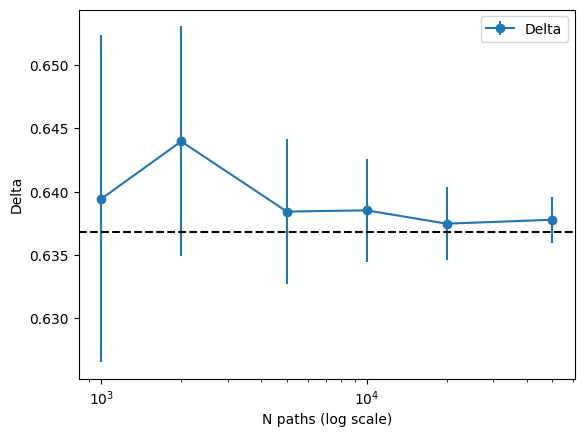

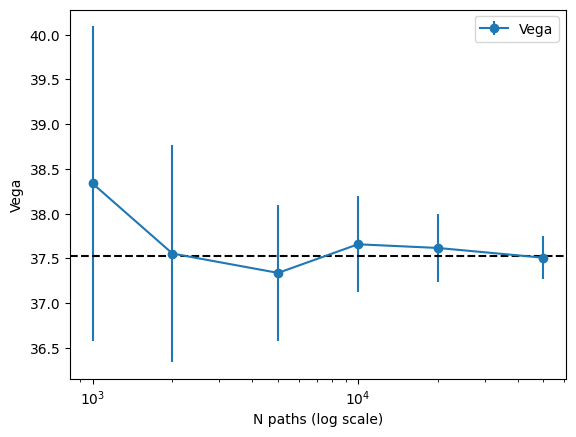

In [9]:
import matplotlib.pyplot as plt

def convergence_plot(estimator, label, Ns=[1000,2000,5000,10000,20000,50000]):
    means = []
    ses = []
    for n in Ns:
        est, se, ci = estimator(S0,K,T,r,sigma,n_paths=n,seed=SEED)
        means.append(est)
        ses.append(se)
    plt.errorbar(Ns, means, yerr=ses, fmt="o-", label=label)
    plt.axhline(analytic[label], color="k", linestyle="--")
    plt.xscale("log")
    plt.xlabel("N paths (log scale)")
    plt.ylabel(label)
    plt.legend()
    plt.show()

convergence_plot(greeks.mc_delta_pathwise_call, "Delta")
convergence_plot(greeks.mc_vega_pathwise_call, "Vega")

## Notes
- Pathwise Delta and Vega match BS Greeks very well.
- Gamma requires finite-difference approximation (delta distribution issue).
- LR Delta works but has higher variance.
- Finite-difference estimators are flexible but more expensive.

## Now with Theta and Rho finite-difference MC estimators

In [13]:
# %% MC Theta & Rho (finite-difference)
theta_fd, se_theta, ci_theta = greeks.mc_theta_fd_central(S0,K,T,r,sigma,n_paths,seed=SEED)
rho_fd,   se_rho,   ci_rho   = greeks.mc_rho_fd_central(S0,K,T,r,sigma,n_paths,seed=SEED)

theta_bs_call = greeks.bs_theta(S0, K, T, r, sigma, option="call")
rho_bs_call   = greeks.bs_rho(S0, K, T, r, sigma, option="call")

theta_fd, ci_theta, theta_bs_call, rho_fd, ci_rho, rho_bs_call

(6.416931016943162,
 (6.362077937127785, 6.471784096758539),
 -6.414027546438197,
 53.32351129451886,
 (53.03094597025619, 53.61607661878153),
 53.232481545376345)

In [14]:
df.loc["Theta","MC estimators"] = theta_fd
df.loc["Rho","MC estimators"] = rho_fd
df

,Analytic,MC estimators
Greek,,
Delta,0.636831,0.637775
Gamma,0.018762,0.027086
Vega,37.524035,37.508181
Theta,-6.414028,6.416931
Rho,53.232482,53.323511


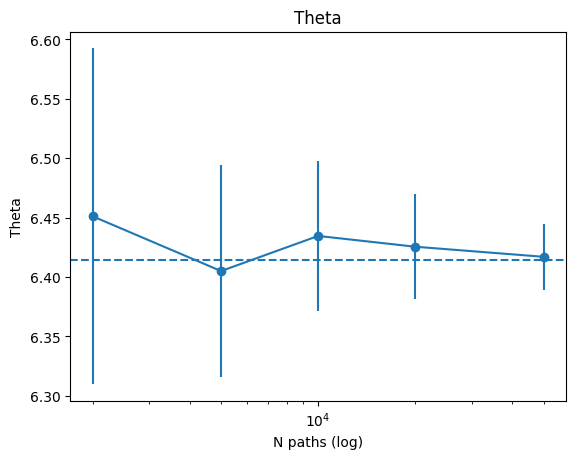

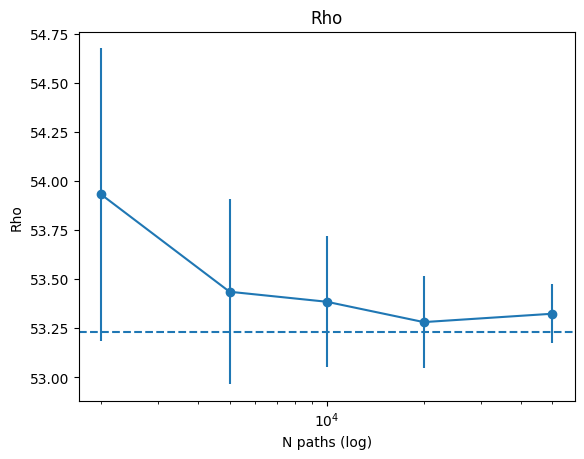

In [17]:
def convergence_plot_simple(estimator, true_value, label, Ns=[2000,5000,10000,20000,50000]):
    means, ses = [], []
    for n in Ns:
        est, se, _ = estimator(S0,K,T,r,sigma,n_paths=n,seed=SEED)
        means.append(est); ses.append(se)
    import matplotlib.pyplot as plt
    plt.errorbar(Ns, means, yerr=ses, fmt="o-")
    plt.axhline(true_value, linestyle="--")
    plt.xscale("log"); plt.xlabel("N paths (log)"); plt.ylabel(label); plt.title(label)
    plt.show()

convergence_plot_simple(greeks.mc_theta_fd_central, abs(theta_bs_call), "Theta")
convergence_plot_simple(greeks.mc_rho_fd_central,   rho_bs_call,   "Rho")

In [18]:
! jupyter nbconvert --to pdf notebooks/demo_greeks.ipynb

[NbConvertApp] Converting notebook notebooks/demo_greeks.ipynb to pdf
[NbConvertApp] Support files will be in demo_greeks_files/
[NbConvertApp] Making directory ./demo_greeks_files
[NbConvertApp] Writing 46020 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 133665 bytes to notebooks/demo_greeks.pdf
